# Jupyter notebook magic setup

In [1]:
%load_ext autoreload
%autoreload 2

# Importing the libraries

In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from tools.ramanflow.read_data import ReadData as RD
# from tools.ramanflow.prep_data import PrepData as rpd

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# import os
import pandas as pd

In [5]:
from scipy.signal import savgol_filter
from joblib import Parallel, delayed

# Read the data

In [6]:
f_sup_0810, car_0810 = RD.read_dir_tiff_files('../data/20210810 SERS timed immersion experiment/1')
_, aceta_0810 = RD.read_dir_tiff_files('../data/20210810 SERS timed immersion experiment/4')
_, aceph_0810 = RD.read_dir_tiff_files('../data/20210810 SERS timed immersion experiment/5')
_, car_aceta_0810 = RD.read_dir_tiff_files('../data/20210810 SERS timed immersion experiment/1+4')
_, car_aceph_0810 = RD.read_dir_tiff_files('../data/20210810 SERS timed immersion experiment/1+5')
_, aceta_aceph_0810 = RD.read_dir_tiff_files('../data/20210810 SERS timed immersion experiment/4+5')
_, car_aceta_aceph_0810 = RD.read_dir_tiff_files('../data/20210810 SERS timed immersion experiment/1+4+5')

In [7]:
f_sup_0811, car_0811 = RD.read_dir_tiff_files('../data/20210811 SERS timed immersion experiment/1')
_, aceta_0811 = RD.read_dir_tiff_files('../data/20210811 SERS timed immersion experiment/4')
_, aceph_0811 = RD.read_dir_tiff_files('../data/20210811 SERS timed immersion experiment/5')
_, car_aceta_0811 = RD.read_dir_tiff_files('../data/20210811 SERS timed immersion experiment/1+4')
_, car_aceph_0811 = RD.read_dir_tiff_files('../data/20210811 SERS timed immersion experiment/1+5')
_, aceta_aceph_0811 = RD.read_dir_tiff_files('../data/20210811 SERS timed immersion experiment/4+5')
_, car_aceta_aceph_0811 = RD.read_dir_tiff_files('../data/20210811 SERS timed immersion experiment/1+4+5')

In [8]:
f_sup_0813, car_0813 = RD.read_dir_tiff_files('../data/20210813 SERS timed immersion experiment/1')
_, aceta_0813 = RD.read_dir_tiff_files('../data/20210813 SERS timed immersion experiment/4')
_, aceph_0813 = RD.read_dir_tiff_files('../data/20210813 SERS timed immersion experiment/5')
_, car_aceta_0813 = RD.read_dir_tiff_files('../data/20210813 SERS timed immersion experiment/1+4')
_, car_aceph_0813 = RD.read_dir_tiff_files('../data/20210813 SERS timed immersion experiment/1+5')
_, aceta_aceph_0813 = RD.read_dir_tiff_files('../data/20210813 SERS timed immersion experiment/4+5')
_, car_aceta_aceph_0813 = RD.read_dir_tiff_files('../data/20210813 SERS timed immersion experiment/1+4+5')

In [9]:
f_sup_0818, car_0818 = RD.read_dir_tiff_files('../data/20210818 SERS timed immersion experiment/1')
_, aceta_0818 = RD.read_dir_tiff_files('../data/20210818 SERS timed immersion experiment/4')
_, aceph_0818 = RD.read_dir_tiff_files('../data/20210818 SERS timed immersion experiment/5')
_, car_aceta_0818 = RD.read_dir_tiff_files('../data/20210818 SERS timed immersion experiment/1+4')
_, car_aceph_0818 = RD.read_dir_tiff_files('../data/20210818 SERS timed immersion experiment/1+5')
_, aceta_aceph_0818 = RD.read_dir_tiff_files('../data/20210818 SERS timed immersion experiment/4+5')
_, car_aceta_aceph_0818 = RD.read_dir_tiff_files('../data/20210818 SERS timed immersion experiment/1+4+5')

# Preprocessing the data

### Create the numpy arrays to hold the data

In [10]:
peak_amplitude_time_log = [5, 30, 60, 180, 300, 1440, 4320, 11520]

car_power_time_evol_mean = np.zeros((5, 8, 1600))
aceta_power_time_evol_mean = np.zeros((5, 8, 1600))
aceph_power_time_evol_mean = np.zeros((5, 8, 1600))
car_aceta_power_time_evol_mean = np.zeros((5, 8, 1600))
car_aceph_power_time_evol_mean = np.zeros((5, 8, 1600))
aceta_aceph_power_time_evol_mean = np.zeros((5, 8, 1600))
car_aceta_aceph_power_time_evol_mean = np.zeros((5, 8, 1600))

### Set up the time labels

In [11]:
# time_labels = ['5 min', '30 min', '1 hour', '3 hours', '5 hours', '24 hours', '3 days (4320 mins)', '8 days (11520 mins)']
time_labels = ['5 m.', '30 m.', '1 h.', '3 h.', '5 h.', '24 h.', '3 d.', '8 d.']
powers = [str(power) for power in range(1, 6)]

### Unpack the data

In [12]:
power_table = pd.read_csv("../data/power_table.csv")
power_hwp = power_table["HWP Angle"].tolist()
power_watts = power_table["no ND"].tolist()

power_hwp_labels = power_table["HWP Angle"].apply(str).tolist()
power_watts_labels = power_table["no ND"].apply(str).tolist()

carbendanzim_data = {**car_0810, **car_0811, **car_0813, **car_0818}
acetamiprid_data = {**aceta_0810, **aceta_0811, **aceta_0813, **aceta_0818}
acephate_data = {**aceph_0810, **aceph_0811, **aceph_0813, **aceph_0818}
car_aceta_data = {**car_aceta_0810, **car_aceta_0811, **car_aceta_0813, **car_aceta_0818}
car_aceph_data = {**car_aceph_0810, **car_aceph_0811, **car_aceph_0813, **car_aceph_0818}
aceta_aceph_data = {**aceta_aceph_0810, **aceta_aceph_0811, **aceta_aceph_0813, **aceta_aceph_0818}
car_aceta_aceph_data = {**car_aceta_aceph_0810, **car_aceta_aceph_0811, **car_aceta_aceph_0813, **car_aceta_aceph_0818}

### Process the data and get the mean for each time step and store it in a row of a numpy array

In [13]:
times = ['5min', '30min', '1hour', '3hours', '5hours', '24hours', '1458hours', '1530']
powers = range(1, 6)
for i, power in enumerate(powers):
    for j, time in enumerate(times):
        key = f'1_{time}_{power}'
        car_power_time_evol_mean[i - 1, j] = np.mean(carbendanzim_data[key], axis=0)

In [15]:
times = ['5min', '30min', '1hour', '3hours', '5hours', '24hours', '1513hours', '1540']
powers = range(1, 6)
for i, power in enumerate(powers):
    for j, time in enumerate(times):
        key = f'4_{time}_{power}'
        aceta_power_time_evol_mean[i - 1, j] = np.mean(acetamiprid_data[key], axis=0)

In [16]:
times = ['5min', '30min', '1hour', '3hours', '5hours', '24hours', '1538hours', '1545(inside)']
powers = range(1, 6)
for i, power in enumerate(powers):
    for j, time in enumerate(times):
        key = f'5_{time}_{power}'
        aceph_power_time_evol_mean[i - 1, j] = np.mean(acephate_data[key], axis=0)

In [17]:
times = ['5min', '30min', '1hour', '3hours', '5hours', '24hours', '1550hour', '1605']
powers = range(1, 6)
for i, power in enumerate(powers):
    for j, time in enumerate(times):
        key = f'1+4_{time}_{power}'
        car_aceta_power_time_evol_mean[i - 1, j] = np.mean(car_aceta_data[key], axis=0)

In [18]:
times = ['5min', '30min', '1hour', '3hours', '5hours', '24hours', '1632hour', '1635']
powers = range(1, 6)
for i, power in enumerate(powers):
    for j, time in enumerate(times):
        key = f'1+5_{time}_{power}'
        car_aceph_power_time_evol_mean[i - 1, j] = np.mean(car_aceph_data[key], axis=0)

In [19]:
times = ['5min', '30min', '1hour', '3hours', '5hours', '24hours', '1642hour', '1645']
powers = range(1, 6)
for i, power in enumerate(powers):
    for j, time in enumerate(times):
        key = f'4+5_{time}_{power}'
        aceta_aceph_power_time_evol_mean[i - 1, j] = np.mean(aceta_aceph_data[key], axis=0)

In [20]:
times = ['5min', '30min', '1hour', '3hours', '5hours', '24hours', '1650hour', '1650']
powers = range(1, 6)
for i, power in enumerate(powers):
    for j, time in enumerate(times):
        key = f'1+4+5_{time}_{power}'
        car_aceta_aceph_power_time_evol_mean[i - 1, j] = np.mean(car_aceta_aceph_data[key], axis=0)

### Create the numpy arrays to hold the smoothed data

In [22]:
car_power_time_evol_mean_smooth = np.zeros_like(car_power_time_evol_mean)
aceta_power_time_evol_mean_smooth = np.zeros_like(aceta_power_time_evol_mean)
aceph_power_time_evol_mean_smooth = np.zeros_like(aceph_power_time_evol_mean)
car_aceta_power_time_evol_mean_smooth = np.zeros_like(car_aceta_power_time_evol_mean)
car_aceph_power_time_evol_mean_smooth = np.zeros_like(car_aceph_power_time_evol_mean)
aceta_aceph_power_time_evol_mean_smooth = np.zeros_like(aceta_aceph_power_time_evol_mean)
car_aceta_aceph_power_time_evol_mean_smooth = np.zeros_like(car_aceta_aceph_power_time_evol_mean)

### Use joblib to smooth the data in parallel and save time

In [23]:
def smooth_data(data):
    return savgol_filter(data, window_length=window_length, polyorder=polyorder)

In [24]:
window_length = 5
polyorder = 3
axis = 1
n_jobs = -1

In [25]:
car_power_time_evol_mean_smooth = Parallel(n_jobs=n_jobs)(delayed(smooth_data)(data) for data in car_power_time_evol_mean)
aceta_power_time_evol_mean_smooth = Parallel(n_jobs=n_jobs)(delayed(smooth_data)(data) for data in aceta_power_time_evol_mean)
aceph_power_time_evol_mean_smooth = Parallel(n_jobs=n_jobs)(delayed(smooth_data)(data) for data in aceph_power_time_evol_mean)
car_aceta_power_time_evol_mean_smooth = Parallel(n_jobs=n_jobs)(delayed(smooth_data)(data) for data in car_aceta_power_time_evol_mean)
car_aceph_power_time_evol_mean_smooth = Parallel(n_jobs=n_jobs)(delayed(smooth_data)(data) for data in car_aceph_power_time_evol_mean)
aceta_aceph_power_time_evol_mean_smooth = Parallel(n_jobs=n_jobs)(delayed(smooth_data)(data) for data in aceta_aceph_power_time_evol_mean)
car_aceta_aceph_power_time_evol_mean_smooth = Parallel(n_jobs=n_jobs)(delayed(smooth_data)(data) for data in car_aceta_aceph_power_time_evol_mean)

### Get the noise of the data

In [26]:
car_power_time_evol_noise = car_power_time_evol_mean_smooth - car_power_time_evol_mean
aceta_power_time_evol_noise = aceta_power_time_evol_mean_smooth - aceta_power_time_evol_mean
aceph_power_time_evol_noise = aceph_power_time_evol_mean_smooth - aceph_power_time_evol_mean
car_aceta_power_time_evol_noise = car_aceta_power_time_evol_mean_smooth - car_aceta_power_time_evol_mean
car_aceph_power_time_evol_noise = car_aceph_power_time_evol_mean_smooth - car_aceph_power_time_evol_mean
aceta_aceph_power_time_evol_noise = aceta_aceph_power_time_evol_mean_smooth - aceta_power_time_evol_mean
car_aceta_aceph_power_time_evol_noise = car_aceta_aceph_power_time_evol_mean_smooth - car_aceta_aceph_power_time_evol_mean

In [27]:
car_power_time_evol_mean_smooth = np.array(car_power_time_evol_mean_smooth)
aceta_power_time_evol_mean_smooth = np.array(aceta_power_time_evol_mean_smooth)
aceph_power_time_evol_mean_smooth = np.array(aceph_power_time_evol_mean_smooth)
car_aceta_power_time_evol_mean_smooth = np.array(car_aceta_power_time_evol_mean_smooth)
car_aceph_power_time_evol_mean_smooth = np.array(car_aceph_power_time_evol_mean_smooth)
aceta_aceph_power_time_evol_mean_smooth = np.array(aceta_aceph_power_time_evol_mean_smooth)
car_aceta_aceph_power_time_evol_mean_smooth = np.array(car_aceta_aceph_power_time_evol_mean_smooth)

In [28]:
car_intensity = np.sum(car_power_time_evol_mean, axis=-1)
aceta_intensity = np.sum(aceta_power_time_evol_mean, axis=-1)
aceph_intensity = np.sum(aceph_power_time_evol_mean, axis=-1)
car_aceta_intensity = np.sum(car_aceta_power_time_evol_mean, axis=-1)
car_aceph_intensity = np.sum(car_aceph_power_time_evol_mean, axis=-1)
aceta_aceph_intensity = np.sum(aceta_power_time_evol_mean, axis=-1)
car_aceta_aceph_intensity = np.sum(car_aceta_aceph_power_time_evol_mean, axis=-1)

### Get the colloidal data

In [29]:
colloidal_power_mean = np.zeros((5, 1600))
_, colloidal_power = RD.read_dir_tiff_files("../data/20210810 SERS timed immersion experiment/colloidal solution")

### Caclulate the SNR

In [30]:
car_power_snr = np.sum(np.abs(car_power_time_evol_mean) ** 2, axis=-1) / np.sum(np.abs(car_power_time_evol_noise) ** 2, axis=-1)
aceta_power_snr = np.sum(np.abs(aceta_power_time_evol_mean) ** 2, axis=-1) / np.sum(np.abs(aceta_power_time_evol_noise) ** 2, axis=-1)
aceph_power_snr = np.sum(np.abs(aceph_power_time_evol_mean) ** 2, axis=-1) / np.sum(np.abs(aceph_power_time_evol_noise) ** 2, axis=-1)
car_aceta_power_snr = np.sum(np.abs(car_aceta_power_time_evol_mean) ** 2, axis=-1) / np.sum(np.abs(car_aceta_power_time_evol_noise) ** 2, axis=-1)
car_aceph_power_snr = np.sum(np.abs(car_aceph_power_time_evol_mean) ** 2, axis=-1) / np.sum(np.abs(car_aceph_power_time_evol_noise) ** 2, axis=-1)
aceta_aceph_power_snr = np.sum(np.abs(aceta_power_time_evol_mean) ** 2, axis=-1) / np.sum(np.abs(aceta_aceph_power_time_evol_noise) ** 2, axis=-1)
car_aceta_aceph_power_snr = np.sum(np.abs(car_aceta_aceph_power_time_evol_mean) ** 2, axis=-1) / np.sum(np.abs(car_aceta_aceph_power_time_evol_noise) ** 2, axis=-1)

In [31]:
car_power_snr_log = 10 * np.log10(car_power_snr)
aceta_power_snr_log = 10 * np.log10(aceta_power_snr)
aceph_power_snr_log = 10 * np.log10(aceph_power_snr)
car_aceta_power_snr_log = 10 * np.log10(car_aceta_power_snr)
car_aceph_power_snr_log = 10 * np.log10(car_aceph_power_snr)
aceta_aceph_power_snr_log = 10 * np.log10(aceta_aceph_power_snr)
car_aceta_aceph_power_snr_log = 10 * np.log10(car_aceta_aceph_power_snr)

# Data visualization"

### Visualizing the time evolution.

Plot the time evolution of Carbendazim.

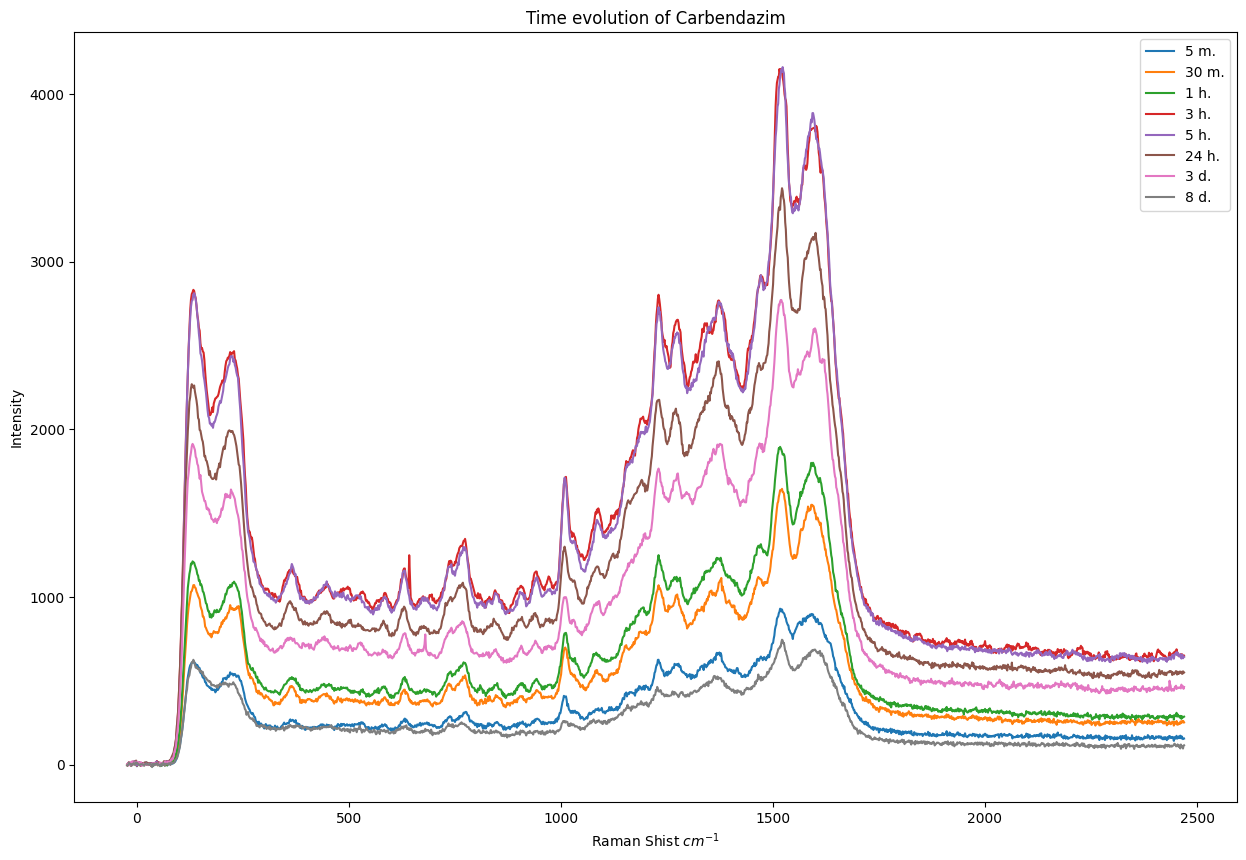

In [32]:
colors = {
    'blue': '#1f77b4',
    'orange': '#ff7f0e',
    'green': '#2ca02c',
    'red': '#d62728',
    'purple': '#9467bd',
    'brown': '#8c564b',
    'pink': '#e377c2',
    'grey': '#7f7f7f',
}

plt.figure(figsize=(15, 10))
for i in range(len(time_labels)):
    color_key = list(colors.keys())[i]  # get color by index
    plt.plot(f_sup_0810, car_power_time_evol_mean[0, i], label=time_labels[i], color=colors[color_key])
plt.legend()
plt.title("Time evolution of Carbendazim")
plt.xlabel("Raman Shist $cm^{-1}$")
plt.ylabel("Intensity")
plt.show()

Plot the time evolution of Acetamiprid.

In [ ]:
colors = {
    'blue': '#1f77b4',
    'orange': '#ff7f0e',
    'green': '#2ca02c',
    'red': '#d62728',
    'purple': '#9467bd',
    'brown': '#8c564b',
    'pink': '#e377c2',
    'grey': '#7f7f7f',
}

plt.figure(figsize=(15, 10))
for i in range(len(time_labels)):
    color_key = list(colors.keys())[i]  # get color by index
    plt.plot(f_sup_0810, aceta_power_time_evol_mean[4, i], label=time_labels[i], color=colors[color_key])
plt.legend()
plt.xlabel("Raman Shist $cm^{-1}$")
plt.ylabel("Intensity")
plt.title("Time evolution of Acetamiprid")
plt.show()

Plot the time evolution of the mixture of Carbendazim and Acetamiprid.

In [ ]:
colors = {
    'blue': '#1f77b4',
    'orange': '#ff7f0e',
    'green': '#2ca02c',
    'red': '#d62728',
    'purple': '#9467bd',
    'brown': '#8c564b',
    'pink': '#e377c2',
    'grey': '#7f7f7f',
}

plt.figure(figsize=(15, 10))
for i in range(len(time_labels)):
    color_key = list(colors.keys())[i]  # get color by index
    plt.plot(f_sup_0810, car_aceta_power_time_evol_mean[0, i], label=time_labels[i], color=colors[color_key])
plt.legend()
plt.title("Time evolution of Carbendazim and Acetamiprid")
plt.xlabel("Raman Shist $cm^{-1}$")
plt.ylabel("Intensity")
plt.show()

### Visuzlalizing the time evolution of SNR of Carbendazim and Acetamiprid.
Note: Check the SNR of Carbendazim and Acetamiprid prior to this experiment.


In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(time_labels, car_power_snr_log[0], label='Carbendazim')
plt.plot(time_labels, aceta_power_snr_log[4], label='Acetamiprid')
plt.plot(time_labels, car_aceta_power_snr_log[4], label='Carbendazim and Acetamiprid')
plt.title('SNR of Carbendazim, Acetamiprid and the mixture.')
plt.xlabel('Time')
plt.ylabel('SNR db.')
plt.legend()
plt.show()

## Export the data to a.csv file for Latex visualization.

Time evolution of Carbendazim

In [ ]:
columns = [f_sup_0810] + [car_power_time_evol_mean[0, j] for j in range(car_power_time_evol_mean.shape[1])]

np.savetxt('Carbendazim_time_evol.csv', np.column_stack(columns), delimiter=',')

Time evolution of Acetamiprid

In [ ]:
columns = [f_sup_0810] + [aceta_power_time_evol_mean[4, j] for j in range(aceta_power_time_evol_mean.shape[1])]

np.savetxt('Acetamiprid_time_evol.csv', np.column_stack(columns), delimiter=',')

Time evolution of Acephate

In [ ]:
columns = [f_sup_0810] + [aceph_power_time_evol_mean[4, j] for j in range(aceph_power_time_evol_mean.shape[1])]

np.savetxt('Acephate_time_evol.csv', np.column_stack(columns), delimiter=',')

Time evolution of the mixture of Carbendazim and Acetamiprid

In [ ]:
columns = [f_sup_0810] + [car_aceta_power_time_evol_mean[0, j] for j in range(car_aceta_power_time_evol_mean.shape[1])]

np.savetxt('Car_Aceta_time_evol.csv', np.column_stack(columns), delimiter=',')

SNR of Carbendazim, Acetamiprid and the mixture throughout the experiment.

In [ ]:
columns = []

for j in range(car_power_snr.shape[1]):
    columns.append(car_power_snr[0, j])
    
np.savetxt('Carbendazim_snr.csv', columns, delimiter=',')

# Data Analysis

### Locating peaks

In [ ]:
# car_peaks_pos = [308, 669, 890, 1104, 1147, 1247, 1345, 1400, 1467]
# car_peaks = np.array([212, 444, 586, 723, 751, 815, 878, 913, 956])

carbendazim_peaks = [625, 727, 1009, 1270, 1468]
acetamiprid_peaks = [630, 827, 1111, 2177]
acephate_peaks = [273, 377, 466, 1102]
car_aceta_peaks = carbendazim_peaks + acetamiprid_peaks
car_aceph_peaks = carbendazim_peaks + acephate_peaks
aceta_aceph_peaks = acetamiprid_peaks + acephate_peaks
car_aceta_aceph_peaks = carbendazim_peaks + acetamiprid_peaks + acephate_peaks

In [ ]:
# Find the index of each peak in carbendazim_peaks in f_sup array.
carbendazim_peaks_index = np.zeros(len(carbendazim_peaks), dtype=int)
for i in range(len(carbendazim_peaks)):
    carbendazim_peaks_index[i] = np.argmin(np.abs(f_sup_0810 - carbendazim_peaks[i]))

In [ ]:
# Find the index of each peak in acetamiprid_peaks in f_sup_0810 array
acetamiprid_peaks_index = np.zeros(len(acetamiprid_peaks), dtype=int)
for i in range(len(acetamiprid_peaks)):
    acetamiprid_peaks_index[i] = np.argmin(np.abs(f_sup_0810 - acetamiprid_peaks[i]))

In [ ]:
# Find the index of each peak in acephate_peaks in f_sup_0810 array
acephate_peaks_index = np.zeros(len(acephate_peaks), dtype=int)
for i in range(len(acephate_peaks)):
    acephate_peaks_index[i] = np.argmin(np.abs(f_sup_0810 - acephate_peaks[i]))

In [ ]:
carbendazim_peaks_index

### Plotting peaks and spectra together.

In [ ]:
# Find polynomial interpolation for 10 points to the left and right around each peak in carbendazim_peaks_index 
# in f_sup_0810 and car_power_time_evol_mean_smooth[4, 0, :] arrayy and plot it.
deg = 2
carbendazim_peaks_interpol = np.zeros((len(carbendazim_peaks), deg + 1))
for i in range(len(carbendazim_peaks)):
    x = f_sup_0810[carbendazim_peaks_index[i] - 10: carbendazim_peaks_index[i] + 11]
    y = car_power_time_evol_mean_smooth[4, 0, carbendazim_peaks_index[i] - 10: carbendazim_peaks_index[i] + 11]
    print("x shape:", x.shape)
    print("y shape:", y.shape)
    carbendazim_peaks_interpol[i, :] = np.polyfit(x, y, deg)
    # cauchy 
    # change of the peak in terms of full width half max
    plt.plot(
        x,
        np.polyval(carbendazim_peaks_interpol[i, :], x),
        label=f"peak {str(i)}",
    )

In [ ]:
# Find polynomial interpolation for a larger range of points around each peak in carbendazim_peaks_index 
# in f_sup_0810 and car_power_time_evol_mean_smooth[4, 0, :] array and plot it.
deg = 1
carbendazim_peaks_interpol = np.zeros((len(carbendazim_peaks), deg + 1))
for i in range(len(carbendazim_peaks)):
    x = f_sup_0810[carbendazim_peaks_index[i] - 20: carbendazim_peaks_index[i] + 21]
    y = car_power_time_evol_mean_smooth[4, 0, carbendazim_peaks_index[i] - 20: carbendazim_peaks_index[i] + 21]
    print("x shape:", x.shape)
    print("y shape:", y.shape)
    carbendazim_peaks_interpol[i, :] = np.polyfit(x, y, deg)
    # cauchy 
    # change of the peak in terms of full width half max
    plt.plot(
        x,
        np.polyval(carbendazim_peaks_interpol[i, :], x),
        label=f"peak {str(i)}",
    )

In [ ]:
deg = 1
plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, car_power_time_evol_mean_smooth[4, 0, :], label="carbendazim")
for peak in carbendazim_peaks_index:
    plt.axvline(x=f_sup_0810[peak], color="red", linestyle="--")
    # # Plot points 10 cm-1 to the left and right of the peak
    # plt.scatter(f_sup_0810[peak - 10:peak + 10], car_power_time_evol_mean_smooth[4, 0, peak - 10:peak + 10], color="red", s=10)

    # # Polynomial interpolation of the baseline of the peak
    # x = f_sup_0810[peak - 20: peak + 21]
    # y = car_power_time_evol_mean_smooth[4, 0, peak - 20: peak + 21]
    # # print("x shape:", x.shape)
    # # print("y shape:", y.shape)
    # carbendazim_peaks_interpol[i, :] = np.polyfit(x, y, deg)
    # plt.plot(x, np.polyval(carbendazim_peaks_interpol[i, :], x), label="peak " + str(i))

    # Interpolation of the peak baseline using linear interpolation
    x_interp = np.linspace(f_sup_0810[peak - 20], f_sup_0810[peak + 20], 41)
    y_interp = np.linspace(car_power_time_evol_mean_smooth[4, 0, peak - 20], car_power_time_evol_mean_smooth[4, 0, peak + 20], 41)

    plt.plot(x_interp, y_interp, label=f"peak {str(i)}")
# Plot points 10 cm-1 to the left and 15 cm-1 to the right of the 2nd to last peak of carbendazim_peaks_index
# plt.scatter(f_sup_0810[carbendazim_peaks_index[-2] - 20:carbendazim_peaks_index[-2] + 15], car_power_time_evol_mean_smooth[4, 0, carbendazim_peaks_index[-2] - 15:carbendazim_peaks_index[-2] + 20], color="red", s=10)

plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

In [ ]:
from scipy.optimize import curve_fit

# Define the Cauchy distribution function
def cauchy(x, a, x0, gamma):
    return a / (1 + ((x - x0) / gamma) ** 2)

plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, car_power_time_evol_mean_smooth[4, 0, :], label="carbendazim")

# Fit the Cauchy distribution to the 20 points around each peak in carbendazim_peak_index
for peak in carbendazim_peaks_index[:-1]:
    x = f_sup_0810[peak - 20: peak + 21]
    y = car_power_time_evol_mean_smooth[4, 0, peak - 20: peak + 21]
    popt, pcov = curve_fit(cauchy, x, y)
    plt.plot(x, cauchy(x, *popt), label=f"peak {str(i)}")

In [ ]:
from scipy.stats import cauchy

plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, car_power_time_evol_mean_smooth[4, 0, :], label="carbendazim")

# Fit the Cauchy distribution to the 20 points around each peak in carbendazim_peak_index
for peak in carbendazim_peaks_index[:-1]:
    x = f_sup_0810[peak - 20: peak + 21]
    y = car_power_time_evol_mean_smooth[4, 0, peak - 20: peak + 21]
    dist = cauchy(loc=x.mean(), scale=x.std())
    plt.plot(x, dist.pdf(x) * y.max(), label=f"peak {str(i)}")

In [ ]:
from scipy.stats import cauchy

plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, car_power_time_evol_mean_smooth[4, 0, :], label="carbendazim")

# Fit the Cauchy distribution to the 20 points around each peak in carbendazim_peak_index
for i, peak in enumerate(carbendazim_peaks_index[:-1]):
    x = f_sup_0810[peak - 20: peak + 21]
    y = car_power_time_evol_mean_smooth[4, 0, peak - 20: peak + 21]
    dist = cauchy(loc=x.mean(), scale=x.std())
    pdf = dist.pdf(x)
    pdf_scaled = pdf / pdf.max() * y.max()
    plt.plot(x, pdf_scaled, label=f"peak {str(i)}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Cauchy distribution function
def cauchy(x, a, x0, gamma):
    return a / (1 + ((x - x0) / gamma) ** 2)

# Generate x values
x = np.linspace(-10, 10, 1000)

# Plot the Cauchy distribution with different values of gamma
plt.plot(x, cauchy(x, 1, 0, 1), label="gamma=1")
plt.plot(x, cauchy(x, 1, 0, 2), label="gamma=2")
plt.plot(x, cauchy(x, 1, 0, 5), label="gamma=5")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cauchy distribution")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, aceta_power_time_evol_mean_smooth[4, 7, :], label="acetamiprid")
for peak in acetamiprid_peaks_index:
    plt.axvline(x=f_sup_0810[peak], color="red", linestyle="--")
plt.xlabel("Wavenumber (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.title("Acetamiprid")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, aceph_power_time_evol_mean_smooth[4, 7, :], label="acephate")
for peak in acephate_peaks_index:
    plt.axvline(x=f_sup_0810[peak], color="red", linestyle="--")
plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, car_aceta_power_time_evol_mean_smooth[4, 7, :], label="Carbendazim + Acetamiprid")
for peak_car, peak_aceta in zip(carbendazim_peaks_index[-2:], acetamiprid_peaks_index[-2:]):
    plt.axvline(x=f_sup_0810[peak_car], color="red", linestyle="--")
    plt.axvline(x=f_sup_0810[peak_aceta], color="black", linestyle="--")
plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, car_aceph_power_time_evol_mean_smooth[0, 7, :], label="Carbendazim + Acephate")
for peak_car, peak_aceph in zip(carbendazim_peaks_index[-2:], acephate_peaks_index[-2:]):
    plt.axvline(x=f_sup_0810[peak_car], color="red", linestyle="--")
    plt.axvline(x=f_sup_0810[peak_aceph], color="green", linestyle="--")
plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.title("Carbendazim + Acephate")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, aceta_aceph_power_time_evol_mean_smooth[4, 2, :], label="Acetamiprid + Acephate")
for peak_aceta, peak_aceph in zip(acetamiprid_peaks_index, acephate_peaks_index):
    plt.axvline(x=f_sup_0810[peak_aceta], color="black", linestyle="--")
    plt.axvline(x=f_sup_0810[peak_aceph], color="green", linestyle="--")
plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(f_sup_0810, car_aceta_aceph_power_time_evol_mean_smooth[4, 7, :], label="Carbendazim + Acetamiprid + Acephate")
for peak_car, peak_aceta, peak_aceph in zip(carbendazim_peaks_index, acetamiprid_peaks_index, acephate_peaks_index):
    plt.axvline(x=f_sup_0810[peak_car], color="red", linestyle="--")
    plt.axvline(x=f_sup_0810[peak_aceta], color="black", linestyle="--")
    plt.axvline(x=f_sup_0810[peak_aceph], color="green", linestyle="--")
plt.xlabel("Frequency (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()

### Time evolution of the analyte inside colloidal solution

In [ ]:
plt.figure(figsize=(20, 10)) 
plt.plot(f_sup_0810, car_power_time_evol_mean[4, 0, :], label="Carbendazim")
plt.plot(f_sup_0810, aceta_power_time_evol_mean[4, 6, :], label="Acetamiprid")
plt.plot(f_sup_0810, aceph_power_time_evol_mean[4, 6, :], label="Acephate")
plt.plot(f_sup_0810, car_aceta_power_time_evol_mean[4, 0, :], label="Carbendazim + Acetamiprid")
plt.plot(f_sup_0810, car_aceph_power_time_evol_mean[4, 7, :], label="Carbendazim + Acephate")
plt.plot(f_sup_0810, aceta_aceph_power_time_evol_mean[4, 2, :], label="Acetamiprid + Acephate")
plt.plot(f_sup_0810, car_aceta_aceph_power_time_evol_mean[0, 0, :], label="Carbendazim + Acetamiprid + Acephate")
plt.legend()
plt.xlabel("Wavenumber (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
for spectra in aceph_power_time_evol_mean[4, :, :]:
    plt.plot(f_sup_0810, spectra)
plt.xlabel("Wavenumber (cm$^{-1}$)")
plt.ylabel("Intensity (a.u.)")
plt.title("Acephate")
plt.show()

In [ ]:
# Define a list with distinct colors for each plot
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
for peak_idx, peak, color in zip(carbendazim_peaks_index, carbendazim_peaks, colors):
    ax.plot(
        peak_amplitude_time_log,
        car_power_time_evol_mean_smooth[0, :, peak_idx],
        color=color,
        label=f'Peak at {peak}',
    )
    ax.plot(peak_amplitude_time_log, car_power_time_evol_mean_smooth[0, :, peak_idx], color=color, marker='o', markersize=5)
    i+=1
ax.legend(fontsize=15)
ax.set_xlabel('Measuring time (mins)', fontsize=20)
ax.set_ylabel('Intensity', fontsize=20)
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(peak_amplitude_time_log)
ax.set_xticklabels(time_labels)
plt.title('Carbendazim peaks time evolution at 2.91 mW', fontsize=17)
# plt.show()
plt.savefig('carbendazim_peaks_time_evol_2.91mW.png', dpi=500)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
for peak_idx, peak, color in zip(acetamiprid_peaks_index, acetamiprid_peaks, colors):
    ax.plot(
        peak_amplitude_time_log,
        aceta_power_time_evol_mean_smooth[0, :, peak_idx],
        color=color,
        label=f'Peak at {peak}',
    )
    ax.plot(peak_amplitude_time_log, aceta_power_time_evol_mean_smooth[0, :, peak_idx], color=color, marker='o', markersize=5)
ax.legend(fontsize=15)
ax.set_xlabel('Measuring time (mins)', fontsize=20)
ax.set_ylabel('Intensity', fontsize=20)
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(peak_amplitude_time_log)
ax.set_xticklabels(time_labels)
plt.title('Acetamiprid peaks time evolution at 2.91 mW', fontsize=17)
# plt.show()
plt.savefig('acetamiprid_peaks_time_evol_2.91mW.png', dpi=500)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
for peak_idx, peak, color in zip(acephate_peaks_index, acephate_peaks, colors):
    ax.plot(
        peak_amplitude_time_log,
        aceph_power_time_evol_mean_smooth[0, :, peak_idx],
        color=color,
        label=f'Peak at {peak}',
    )
    ax.plot(peak_amplitude_time_log, aceph_power_time_evol_mean_smooth[0, :, peak_idx], color=color, marker='o', markersize=5)
ax.legend(fontsize=15)
ax.set_xlabel('Measuring time (mins)', fontsize=20)
ax.set_ylabel('Intensity', fontsize=20)
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(peak_amplitude_time_log)
ax.set_xticklabels(time_labels)
plt.title('Acephate peaks time evolution at 2.91 mW', fontsize=17)
# plt.show()
plt.savefig('acephate_peaks_time_evol_2.91mW.png', dpi=500)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
for car_peak_idx, car_peak, aceta_peak_idx, aceta_peak, color in zip(carbendazim_peaks_index, carbendazim_peaks, acetamiprid_peaks_index, acetamiprid_peaks, colors):
    ax.plot(
        peak_amplitude_time_log,
        car_aceta_power_time_evol_mean_smooth[0, :, car_peak_idx],
        color='blue',
        label=f'Carbendazim Peak at {car_peak}',
    )
    ax.plot(peak_amplitude_time_log, car_aceta_power_time_evol_mean_smooth[0, :, car_peak_idx], color='blue', marker='o', markersize=5)
    ax.plot(
        peak_amplitude_time_log,
        car_aceta_power_time_evol_mean_smooth[0, :, aceta_peak_idx],
        color='red',
        label=f'Acetamiprid Peak at {aceta_peak}',
    )
    ax.plot(peak_amplitude_time_log, car_aceta_power_time_evol_mean_smooth[0, :, aceta_peak_idx], color='red', marker='o', markersize=5)
ax.legend(fontsize=15)
ax.set_xlabel('Measuring time (mins)', fontsize=20)
ax.set_ylabel('Intensity', fontsize=20)
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(peak_amplitude_time_log)
ax.set_xticklabels(time_labels)
plt.title('Carbendazim + Acetamiprid peaks time evolution at 2.91 mW', fontsize=17)
# plt.show()
plt.savefig('carbendazim_acetamiprid_peaks_time_evol_2.91mW.png', dpi=500)

In [ ]:
# define a list of colors with 8 distinct colors
colors_eight = ['blue', 'red', 'green', 'orange', 'cyan', 'brown', 'pink', 'gray']

In [ ]:
# import matplotlib.colors as mcolors

# # Get a list of all available colors
# all_colors = mcolors.CSS4_COLORS

# # Print the color names
# for name, color in all_colors.items():
#     print(name)

In [ ]:
plt.figure(figsize=(17, 10))
for time, spectra in enumerate(car_aceta_power_time_evol_mean_smooth[0, :, :]):
    plt.plot(f_sup_0810, spectra, label=f'{time} mins', color=colors_eight[time])
# plt.plot(f_sup_0810, car_aceta_power_time_evol_mean_smooth[0, 1, :], label='Carbendazim Peak at 2.91mW')
plt.xlabel('Wave number (cm$^{-1}$)', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(fontsize=15)
plt.title('Carbendazim + Acetamiprid peaks time evolution at 2.91 mW', fontsize=17)
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
for car_peak_idx, car_peak, aceph_peak_idx, aceph_peak, color in zip(carbendazim_peaks_index, carbendazim_peaks, acephate_peaks_index, acephate_peaks, colors):
    ax.plot(peak_amplitude_time_log, car_aceph_power_time_evol_mean_smooth[0, :, car_peak_idx], color='blue', marker='o', markersize=5)
    ax.plot(
        peak_amplitude_time_log,
        car_aceph_power_time_evol_mean_smooth[0, :, car_peak_idx],
        color='blue',
        label=f'Carbendazim Peak at {car_peak}',
    )
    ax.plot(
        peak_amplitude_time_log,
        car_aceph_power_time_evol_mean_smooth[0, :, aceph_peak_idx],
        color='red',
        label=f'Acephate Peak at {aceph_peak}',
    )
    ax.plot(peak_amplitude_time_log, car_aceph_power_time_evol_mean_smooth[0, :, aceph_peak_idx], color='red', marker='o', markersize=5)
ax.legend(fontsize=15)
ax.set_xlabel('Measuring time (mins)', fontsize=20)
ax.set_ylabel('Intensity', fontsize=20)
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(peak_amplitude_time_log)
ax.set_xticklabels(time_labels)
plt.title('Carbendazim + Acephate peaks time evolution at 2.91 mW', fontsize=17)
# plt.show()
plt.savefig('carbendazim_acephate_peaks_time_evol_2.91mW.png', dpi=500)

In [ ]:
plt.figure(figsize=(17, 10))
for time, spectra in enumerate(car_aceph_power_time_evol_mean_smooth[0, :, :]):
    plt.plot(f_sup_0810, spectra, label=f'{time} mins', color=colors_eight[time])
# plt.plot(f_sup_0810, car_aceta_power_time_evol_mean_smooth[0, 1, :], label='Carbendazim Peak at 2.91mW')
plt.xlabel('Wave number (cm$^{-1}$)', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(fontsize=15)
plt.title('Carbendazim + Acephate peaks time evolution at 2.91 mW', fontsize=17)
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
for aceta_peak_idx, aceta_peak, aceph_peak_idx, aceph_peak, color in zip(acetamiprid_peaks_index, acetamiprid_peaks, acephate_peaks_index, acephate_peaks, colors):
    ax.plot(peak_amplitude_time_log, aceta_aceph_power_time_evol_mean_smooth[0, :, aceta_peak_idx], color='red', marker='o', markersize=5)
    ax.plot(
        peak_amplitude_time_log,
        aceta_aceph_power_time_evol_mean_smooth[0, :, aceta_peak_idx],
        color='red',
        label=f'Acetamiprid Peak at {aceta_peak}',
    )
    ax.plot(
        peak_amplitude_time_log,
        aceta_aceph_power_time_evol_mean_smooth[0, :, aceph_peak_idx],
        color='green',
        label=f'Acephate Peak at {aceph_peak}',
    )
    ax.plot(peak_amplitude_time_log, aceta_aceph_power_time_evol_mean_smooth[0, :, aceph_peak_idx], color='green', marker='o', markersize=5)
ax.legend(fontsize=15)
ax.set_xlabel('Measuring time (mins)', fontsize=20)
ax.set_ylabel('Intensity', fontsize=20)
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(peak_amplitude_time_log)
ax.set_xticklabels(time_labels)
plt.title('Acetamiprid + Acephate peaks time evolution at 2.91 mW', fontsize=17)
# plt.show()
plt.savefig('acetamiprid_acephate_peaks_time_evol_2.91mW.png', dpi=500)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
for car_peak_idx, car_peak, aceta_peak_idx, aceta_peak, aceph_peak_idx, aceph_peak, color in zip(carbendazim_peaks_index, carbendazim_peaks, acetamiprid_peaks_index, acetamiprid_peaks, acephate_peaks_index, acephate_peaks, colors_eight):
    ax.plot(
        peak_amplitude_time_log,
        car_aceta_aceph_power_time_evol_mean_smooth[0, :, car_peak_idx],
        color='blue',
        label=f'Carbendazim Peak at {car_peak}',
    )
    ax.plot(peak_amplitude_time_log, car_aceta_aceph_power_time_evol_mean_smooth[0, :, car_peak_idx], color='blue', marker='o', markersize=5)
    ax.plot(
        peak_amplitude_time_log,
        car_aceta_aceph_power_time_evol_mean_smooth[0, :, aceta_peak_idx],
        color='red',
        label=f'Acetamiprid Peak at {aceta_peak}',
    )
    ax.plot(peak_amplitude_time_log, car_aceta_aceph_power_time_evol_mean_smooth[0, :, aceta_peak_idx], color='red', marker='o', markersize=5)
    ax.plot(
        peak_amplitude_time_log,
        car_aceta_aceph_power_time_evol_mean_smooth[0, :, aceph_peak_idx],
        color='green',
        label=f'Acephate Peak at {aceph_peak}',
    )
    ax.plot(peak_amplitude_time_log, car_aceta_aceph_power_time_evol_mean_smooth[0, :, aceph_peak_idx], color='green', marker='o', markersize=5)
ax.legend(fontsize=15)
ax.set_xlabel('Measuring time (mins)', fontsize=20)
ax.set_ylabel('Intensity', fontsize=20)
ax.set_xscale("log")
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks(peak_amplitude_time_log)
ax.set_xticklabels(time_labels)
plt.title('Carbendazim + Acetamiprid + Acephate peaks time evolution at 2.91 mW', fontsize=17)
# plt.show()
plt.savefig('carbendazim_acetamiprid_acephate_peaks_time_evol_2.91mW.png', dpi=500)

In [ ]:
plt.figure(figsize=(17, 10))
for time, spectra in zip(time_labels, car_aceta_aceph_power_time_evol_mean_smooth[0, :, :]):
    plt.plot(f_sup_0810, spectra, label=f'{time} mins', color=colors_eight[time])
# plt.plot(f_sup_0810, car_aceta_power_time_evol_mean_smooth[0, 1, :], label='Carbendazim Peak at 2.91mW')
plt.xlabel('Wave number (cm$^{-1}$)', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(fontsize=15)
plt.title('Carbendazim + Acetamiprid + Acephate peaks time evolution at 2.91 mW', fontsize=17)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select the two most prominent peaks from each analyte
carbendazim_peaks_index = np.array([0, 1])
acetamiprid_peaks_index = np.array([2, 3])
acephate_peaks_index = np.array([4, 5])

# Define the data for the bar chart
data = np.random.rand(6, 6)

# Plot the bar chart
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
for i, (car_peak_idx, aceta_peak_idx, aceph_peak_idx) in enumerate(zip(carbendazim_peaks_index, acetamiprid_peaks_index, acephate_peaks_index)):
    ax.bar(i*6, data[i, 0], color='blue')
    ax.bar(i*6+1, data[i, 1], color='blue')
    ax.bar(i*6+2, data[i, 2], color='red')
    ax.bar(i*6+3, data[i, 3], color='red')
    ax.bar(i*6+4, data[i, 4], color='green')
    ax.bar(i*6+5, data[i, 5], color='green')
ax.set_xlabel('Colloidal Solution', fontsize=20)
ax.set_ylabel('Amplitude', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.title('Two most prominent peaks from each analyte', fontsize=17)
plt.show()